<a href="https://colab.research.google.com/github/Lizeth058/BIT_BootcampIA/blob/main/Sales_Colombia_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.impute import KNNImputer



from google.colab import drive # Conectandonos con google drive
drive.mount('/content/drive')

import os    # la librería necesaria para la ruta de la carpeta
os.chdir('//content/drive/MyDrive/Colab Notebooks/bootcamp IA/RETO2')


Mounted at /content/drive


In [2]:
# Mostrar lista de archivos
os.listdir()

# Leer los archivos CSV
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')


In [3]:
# Mostrar el DataFrame
df_train

index       V1 CORRELA_16  CORRE_9  IDOJ1   IDAIO   CIMREP       BRUTA  \
0      7627  1660771        464  464-465   11.0  1981.0      0.0   2238145.0   
1      7937  1661445        473      473   14.0  2014.0      0.0   1905867.0   
2      4357  1222540        465  464-465   14.0  1981.0      0.0  22093125.0   
3      6336  1229296        464  464-465    4.0  2004.0      0.0   1365034.0   
4      2350   994677   4711-472  471-472   14.0  2010.0      0.0   5403923.0   
...     ...      ...        ...      ...    ...     ...      ...         ...   
7483   9785  1891766        462  462-463   14.0  2013.0      0.0  37219543.0   
7484   7763  1661118        454  453-454    5.0  2004.0  67517.0   1852287.0   
7485   5218  1227116        465  464-465   14.0  1992.0      0.0    648881.0   
7486   1346   991844        473      473   14.0  2012.0      0.0   3076835.0   
7487   3582  1010503   4711-472  471-472   14.0  2014.0      0.0   1560549.0   

          CONSUI    GAS  ...      INVINI      INVFIN     ROTACION      INVPRO  \
0       125841.0    0.0  ...   1110417.0   1155317.0  25466077.00   1132867.0   
1       634274.0    0.0  ...    251053.0    170247.0   9809655.00    210650.0   
2      6352377.5  714.0  ...  13067906.0  10850543.0   9988335.00  11959224.5   
3       514460.5    0.0  ...   1912369.0   2331970.0   1941959.00   2122169.5   
4      2911758.0    0.0  ...    848774.0   2482444.0  23583502.00   1665609.0   
...          ...    ...  ...         ...         ...          ...         ...   
7483  29113401.5    0.0  ...  14369761.0  14507943.0  56172245.00  14438852.0   
7484    519954.0    0.0  ...   1136264.0   1120963.0   8886383.06   1128613.5   
7485    158278.5  180.0  ...    685497.0    661122.0    900784.00    673309.5   
7486   1365665.5    0.0  ...    188049.0    193719.0  16062154.00    190884.0   
7487    336272.5    0.0  ...    605513.0    854168.0   6873006.00    729840.5   

             CTO      CTOINS  VENTASNOP      GASTOS  GASTOSNOP    GASTOPNOP  
0     25466077.0  25466077.0          0  25721984.0    82021.0   27468490.0  
1      9809655.0   9809655.0          0  10456929.0     6667.0   11182951.0  
2      9988335.0   9988335.0          0  17001301.0  1417890.0   26369223.0  
3      1941959.0   1941959.0          0   2452772.0   242273.0    3143151.0  
4     23583502.0  23583502.0          0  26796715.0   447269.0   29546092.0  
...          ...         ...        ...         ...        ...          ...  
7483  56172245.0  56172245.0          0  86343372.0  3821281.0  101636686.0  
7484   8886383.0   8953900.0          0   9630415.0   111737.0   10729942.0  
7485    900784.0    900784.0          0   1092130.0    55293.0    1499751.0  
7486  16062154.0  16062154.0          0  17577875.0   148759.0   18168540.0  
7487   6873006.0   6873006.0          0   7294178.0   236142.0    8122471.0  

[7488 rows x 65 columns]

In [4]:
# Verificar los tipos de datos en el DataFrame
print(df_train.dtypes)

index           int64
V1              int64
CORRELA_16     object
CORRE_9        object
IDOJ1         float64
               ...   
CTOINS        float64
VENTASNOP       int64
GASTOS        float64
GASTOSNOP     float64
GASTOPNOP     float64
Length: 65, dtype: object


In [5]:
# Qué tamaño tiene el data set?
df_train.shape

(7488, 65)

In [6]:
# Información del DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        7488 non-null   int64  
 1   V1           7488 non-null   int64  
 2   CORRELA_16   7488 non-null   object 
 3   CORRE_9      7488 non-null   object 
 4   IDOJ1        7483 non-null   float64
 5   IDAIO        7486 non-null   float64
 6   CIMREP       7488 non-null   float64
 7   BRUTA        7488 non-null   float64
 8   CONSUI       7488 non-null   float64
 9   GAS          7488 non-null   float64
 10  EMPAQUE      7488 non-null   float64
 11  HONORA       7488 non-null   float64
 12  COMISION     7488 non-null   float64
 13  ARRIENDO     7488 non-null   float64
 14  SEGURO       7488 non-null   float64
 15  ASEO         7488 non-null   float64
 16  ENERGIA      7488 non-null   float64
 17  COMUNICA     7488 non-null   float64
 18  PUBLICO      7488 non-null   float64
 19  FLETES

In [7]:
# Eliminar la columna 'VENTASNOP'
df_train = df_train.drop('VENTASNOP', axis=1)

In [8]:
df_train = df_train.drop(['index', 'V1'], axis=1)

In [9]:
# Seleccionar las columnas de tipo 'object'
columnas_objeto = df_train.select_dtypes(include=['object']).columns

# Crear una lista para almacenar las columnas que no se pueden convertir
columnas_no_convertidas = []

In [10]:
# Intentar convertir cada columna a numérica
for col in columnas_objeto:
    try:
        df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    except:
        print(f"No se pudo convertir la columna {col} a numérica")
        columnas_no_convertidas.append(col)

In [11]:
# Imprimir las columnas que no se pudieron convertir y sus valores únicos no numéricos
for column in columnas_no_convertidas:
    unique_values = df_train[column].unique()
    non_numeric_values = [value for value in unique_values if not isinstance(value, (int, float, np.number))]
    if non_numeric_values:
        print(f"\nColumna '{column}': {non_numeric_values}")


In [12]:
# Imputación de valores faltantes con KNNImputer
imputer = KNNImputer(n_neighbors=5) #ayuda a mantener la integridad de los datos y a mejorar la precisión de los modelos de machine learning que utilices posteriormente.
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)


In [13]:
# Codificar variables categóricas con One-Hot Encoder
df_train_encoded = pd.get_dummies(df_train_imputed, columns=['CORRELA_16', 'CORRE_9'])


In [14]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df_train_encoded.select_dtypes(include=['number']).columns #Representa la dispersión central de los datos.

Q1 = df_train_encoded[columnas_numericas].quantile(0.25)
Q3 = df_train_encoded[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1


In [15]:
# Aplicar la condición de outliers solo a las columnas numéricas
df_train_no_outliers = df_train_encoded[
    ~((df_train_encoded[columnas_numericas] < (Q1 - 1.5 * IQR)) | (df_train_encoded[columnas_numericas] > (Q3 + 1.5 * IQR))).any(axis=1)
]


In [16]:
# Separar datos de entrenamiento en features (X) y target (y)
X = df_train_no_outliers.drop('VENTA', axis=1)
y = df_train_no_outliers['VENTA']


In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Que es  RandomForestRegressor

 funciona como un grupo de "expertos" que dan su opinión sobre un problema. Cada "experto" usa información distinta, y la respuesta final se basa en combinar todas sus opiniones.

In [18]:
# Crear y entrenar el modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [19]:
df_train = df_train_no_outliers


In [20]:
# Número de atributos y registros

num_atributos = len(df_train.columns)
num_registros = len(df_train)


print(f"Número de atributos: {num_atributos}")
print(f"Número de registros: {num_registros}")

Número de atributos: 305
Número de registros: 1042


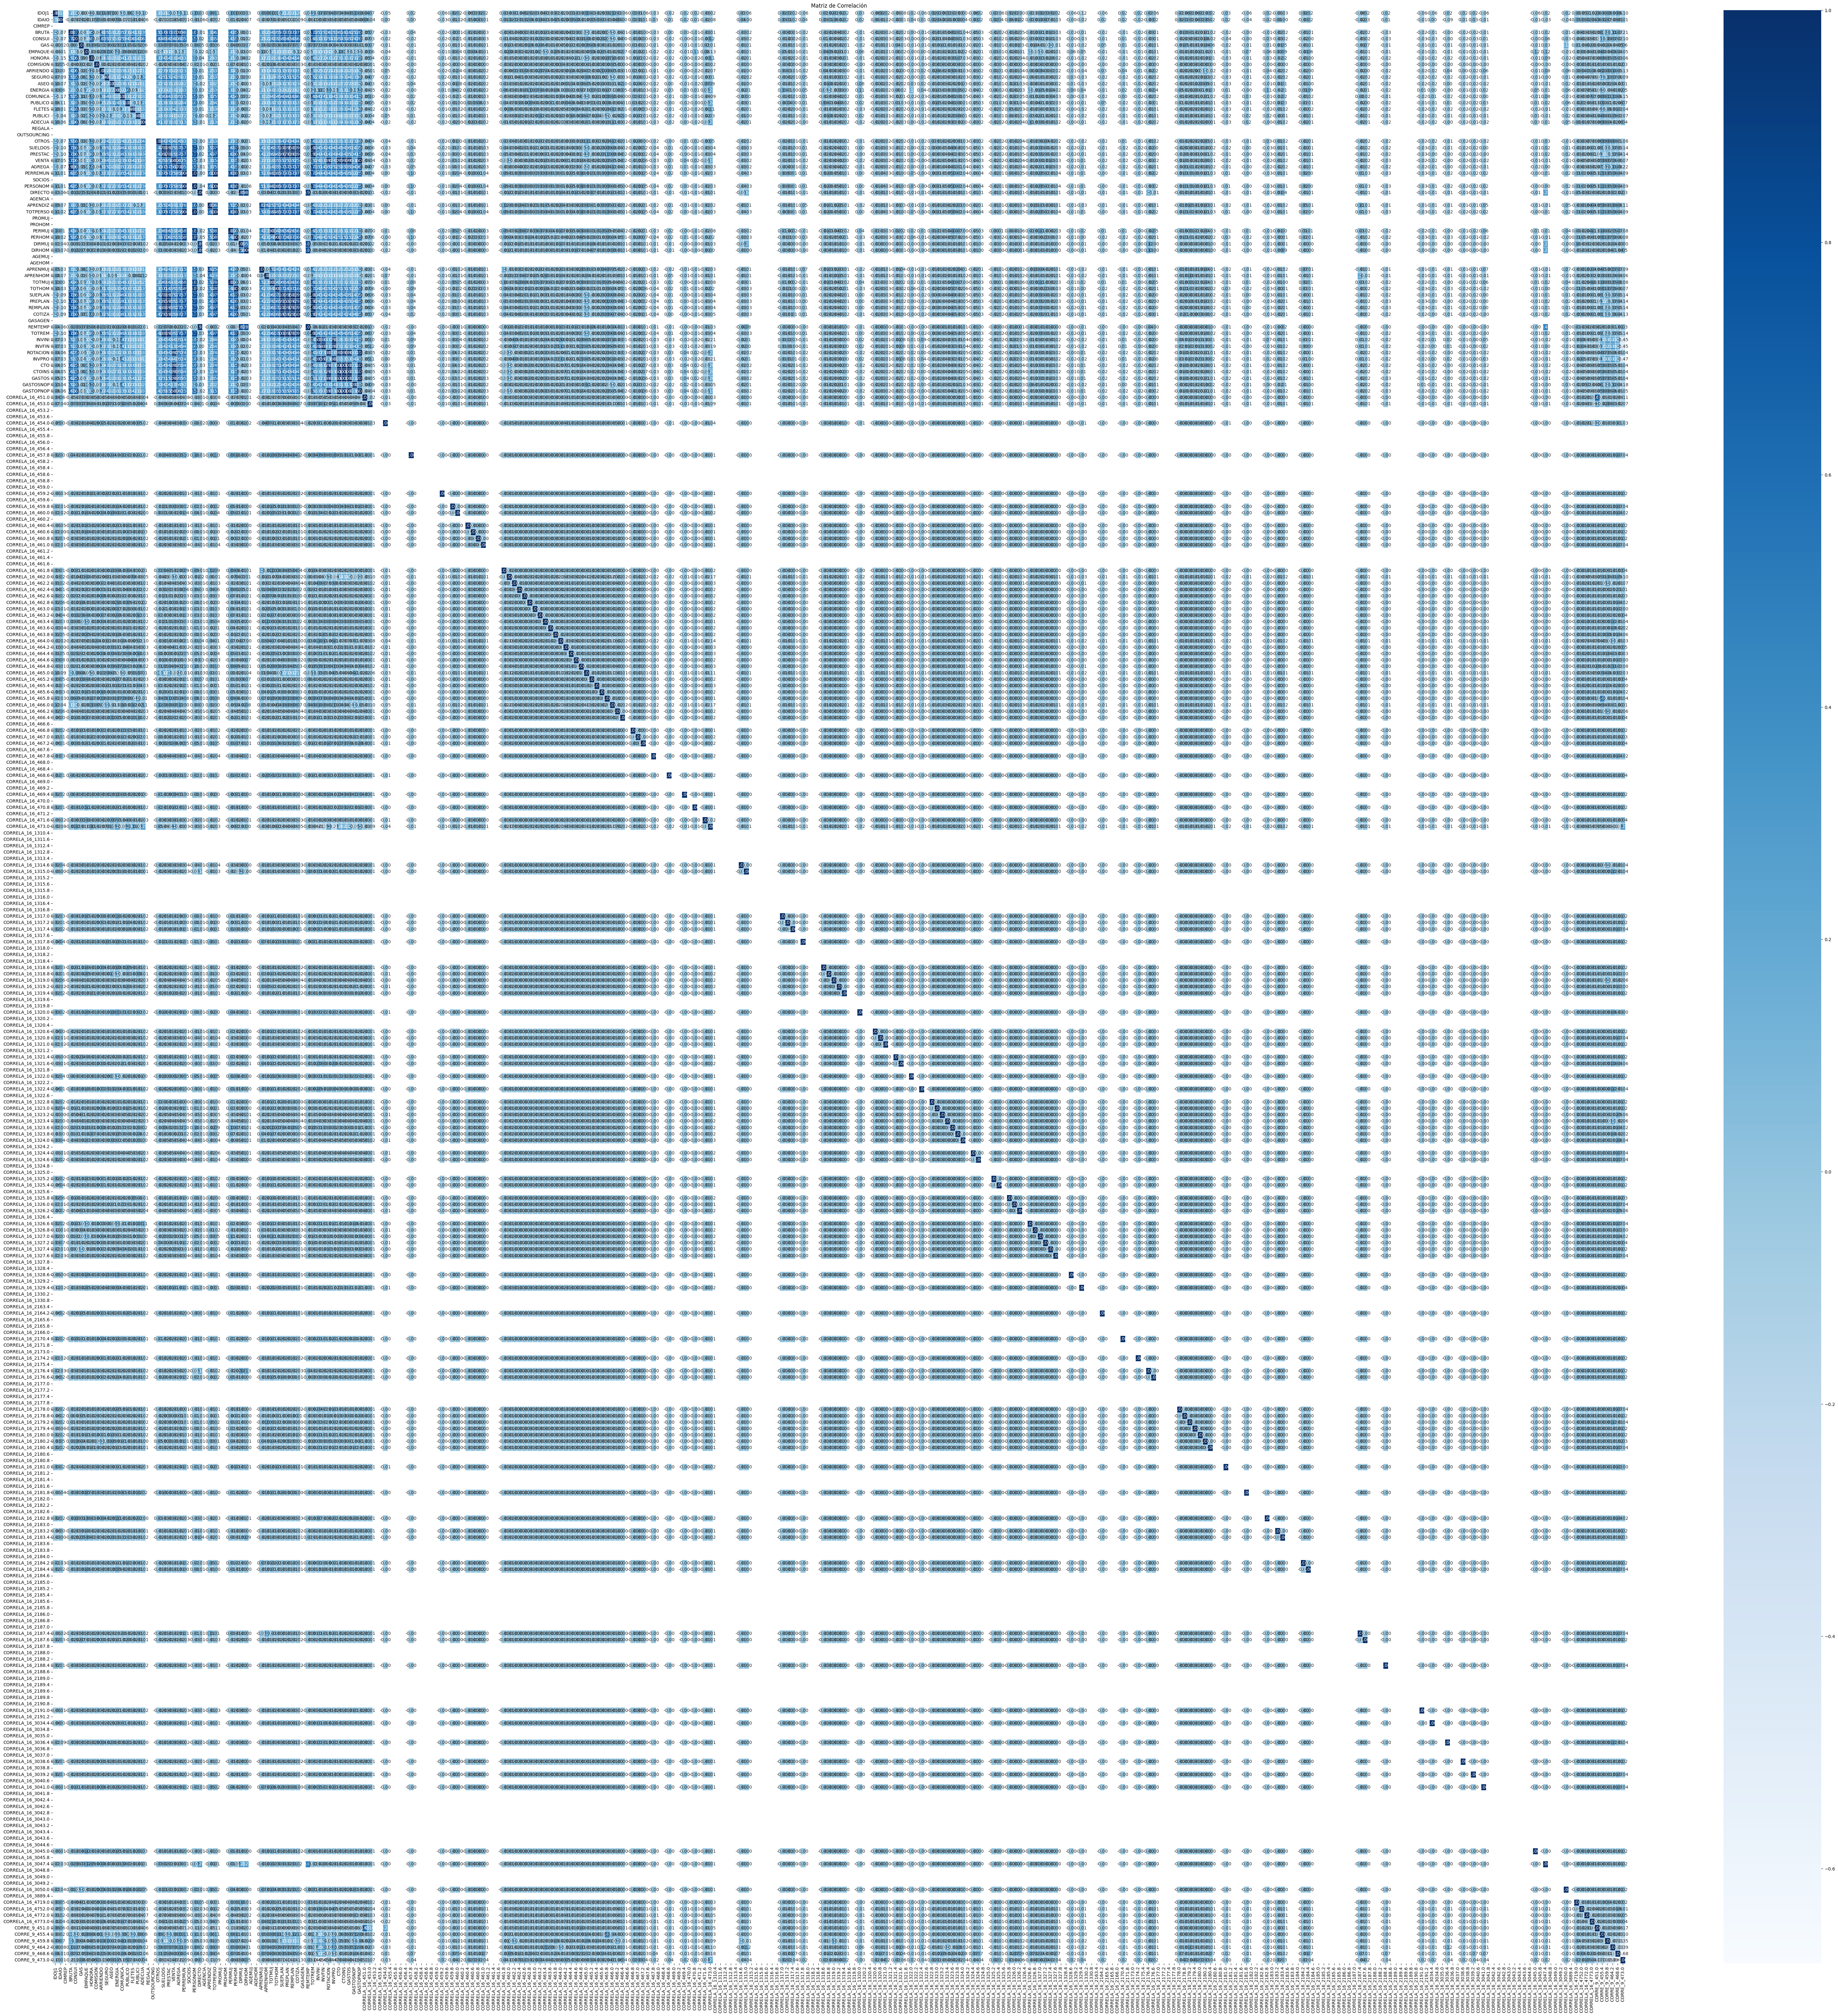

VENTA
0.000000e+00    176
1.161127e+07      1
1.895248e+06      1
7.742009e+06      1
1.086105e+07      1
               ... 
2.025598e+06      1
1.008851e+06      1
4.476066e+06      1
3.067519e+07      1
8.433555e+06      1
Name: count, Length: 867, dtype: int64


In [37]:
# Calcular la matriz de correlación
correlation_matrix = df_train.corr()

# Crear un mapa de correlación
plt.figure(figsize=(80, 80))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# Contar los valores de la variable 'VENTA'
print(df_train['VENTA'].value_counts())


In [22]:
# Encontrar las correlaciones más fuertes
threshold = 0.7  # Umbral para considerar una correlación fuerte
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# Eliminar la diagonal (correlación de una variable consigo misma)
strong_correlations = strong_correlations.mask(np.equal(*np.indices(strong_correlations.shape)))

# Imprimir las correlaciones más fuertes
for col in strong_correlations:
    for row in strong_correlations.index:
        if not pd.isna(strong_correlations.loc[row, col]):
            print(f"Correlación fuerte entre {row} y {col}: {strong_correlations.loc[row, col]}")




Correlación fuerte entre CONSUI y BRUTA: 0.7199187668923823
Correlación fuerte entre SUELDOS y BRUTA: 0.7788709036681191
Correlación fuerte entre PRESTAC y BRUTA: 0.78117255115482
Correlación fuerte entre VENTA y BRUTA: 0.7030816387507941
Correlación fuerte entre AGREGA y BRUTA: 0.9878185229217221
Correlación fuerte entre SUEPLAN y BRUTA: 0.7796876698595158
Correlación fuerte entre PREPLAN y BRUTA: 0.7771530209908623
Correlación fuerte entre REMPLAN y BRUTA: 0.784913037594603
Correlación fuerte entre COTIZA y BRUTA: 0.7518959147804564
Correlación fuerte entre TOTREM y BRUTA: 0.7842881165759606
Correlación fuerte entre BRUTA y CONSUI: 0.7199187668923823
Correlación fuerte entre BRUTA y SUELDOS: 0.7788709036681191
Correlación fuerte entre PRESTAC y SUELDOS: 0.9727536673735734
Correlación fuerte entre AGREGA y SUELDOS: 0.747402260456288
Correlación fuerte entre PERREMUN y SUELDOS: 0.7942927963101418
Correlación fuerte entre PERSONOM y SUELDOS: 0.7923921016271767
Correlación fuerte entre T

In [23]:
# Identificar variables con alta correlación con la variable objetivo
target_correlations = correlation_matrix['VENTA'].abs().sort_values(ascending=False)
print("\nCorrelaciones con la variable objetivo:")
print(target_correlations)


Correlaciones con la variable objetivo:
VENTA                1.000000
GASTOPNOP            0.996659
GASTOS               0.994161
CTO                  0.991825
CTOINS               0.991825
                       ...   
CORRELA_16_3045.8         NaN
CORRELA_16_3048.8         NaN
CORRELA_16_3049.0         NaN
CORRELA_16_3049.2         NaN
CORRELA_16_3889.4         NaN
Name: VENTA, Length: 305, dtype: float64


## QUE ES PCA
es una técnica que reduce la dimensionalidad de los datos encontrando nuevas variables (componentes principales) que capturan la mayor variabilidad posible. Esto simplifica el análisis y la visualización, manteniendo la información esencial.

In [24]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Aplicar PCA con 97% y 99% de varianza para comparar el número de componentes
y evaluar el equilibrio entre complejidad del modelo y precisión.

In [25]:
# Aplicar PCA
pca_97 = PCA(n_components=0.97)
X_pca_97 = pca_97.fit_transform(X_scaled)

# Entrenamiento y evaluación del modelo con PCA 97%
X_train_pca_97, X_test_pca_97, y_train, y_test = train_test_split(X_pca_97, y, test_size=0.2, random_state=42)
model_97 = RandomForestRegressor(random_state=42)
model_97.fit(X_train_pca_97, y_train)
y_pred_97 = model_97.predict(X_test_pca_97)
mse_97 = mean_squared_error(y_test, y_pred_97)
r2_97 = r2_score(y_test, y_pred_97)

print("--- Resultados del modelo con PCA 97% ---")
print(f"Error Cuadrático Medio: {mse_97:.2f}")
print(f"Coeficiente de Determinación: {r2_97:.2f}")


--- Resultados del modelo con PCA 97% ---
Error Cuadrático Medio: 3056117369713.15
Coeficiente de Determinación: 0.94


In [26]:
# Aplicar PCA con un punto de corte de varianza del 99%
pca_99 = PCA(n_components=0.99)
X_pca_99 = pca_99.fit_transform(X_scaled)

# Entrenamiento y evaluación del modelo con PCA 99%
X_train_pca_99, X_test_pca_99, y_train, y_test = train_test_split(X_pca_99, y, test_size=0.2, random_state=42)
model_99 = RandomForestRegressor(random_state=42)
model_99.fit(X_train_pca_99, y_train)
y_pred_99 = model_99.predict(X_test_pca_99)
mse_99 = mean_squared_error(y_test, y_pred_99)
r2_99 = r2_score(y_test, y_pred_99)

print("--- Resultados del modelo con PCA 99% ---")
print(f"Error Cuadrático Medio: {mse_99:.2f}")
print(f"Coeficiente de Determinación: {r2_99:.2f}")


--- Resultados del modelo con PCA 99% ---
Error Cuadrático Medio: 3163600433451.51
Coeficiente de Determinación: 0.93


Al realizar el PCA con dos tipos de corte de varianza de 97% y el 99% encontre que el que mas se acerca a un nivel de mas alto de correlazión  es el de 97% por lo tanto, con este voy a trabajar   

In [27]:
# Obtener importancias de los componentes principales
importances = model_97.feature_importances_
features = [f'PC{i+1}' for i in range(len(importances))]
feature_importances = pd.DataFrame({"feature": features, "importance": importances}).sort_values("importance", ascending=False)

print("\nImportancia de las variables (componentes principales):")
print(feature_importances)




Importancia de las variables (componentes principales):
    feature  importance
1       PC2    0.487153
0       PC1    0.390280
120   PC121    0.019848
2       PC3    0.010152
5       PC6    0.005183
..      ...         ...
58     PC59    0.000226
70     PC71    0.000216
92     PC93    0.000206
111   PC112    0.000148
112   PC113    0.000146

[139 rows x 2 columns]


* Inportancia del componente principal (PC) nos dice que PC2 es el componente mas importante para predecir la variable venta
* Otros componentes tienen una importancia menor: Los demás componentes principales (PC1, PC3,)

In [28]:
# Obtener las cargas de los componentes
loadings = pca_97.components_

# Crear un DataFrame para las cargas
loading_df = pd.DataFrame(loadings, columns=X.columns)

# Agregar etiquetas para los componentes
loading_df.index = [f'PC{i+1}' for i in range(loading_df.shape[0])]

# Mostrar las cargas de PC2 y ordenarlas
pc2_loadings = loading_df.loc['PC2']
pc2_loadings_sorted = pc2_loadings.abs().sort_values(ascending=False)
print("Variables más importantes en PC2:")
print(pc2_loadings_sorted)



Variables más importantes en PC2:
REMTEMP              0.339055
DIRECTO              0.338086
DIRMUJ               0.314816
DIRHOM               0.287159
CTO                  0.262340
                       ...   
CORRELA_16_2177.8    0.000000
CORRELA_16_2177.4    0.000000
CORRELA_16_2177.2    0.000000
CORRELA_16_2177.0    0.000000
CORRELA_16_2181.2    0.000000
Name: PC2, Length: 304, dtype: float64


In [29]:
# Revisar la cantidad de valores nulos en cada columna
print(df_train.isnull().sum())


IDOJ1            0
IDAIO            0
CIMREP           0
BRUTA            0
CONSUI           0
                ..
CORRE_9_455.4    0
CORRE_9_459.8    0
CORRE_9_464.2    0
CORRE_9_468.6    0
CORRE_9_473.0    0
Length: 305, dtype: int64


In [30]:
# atributos Categoricas,

In [31]:
# Aplicar PCA
pca_97 = PCA(n_components=0.97)
X_pca_97 = pca_97.fit_transform(X_scaled)


In [32]:
# Crear un nuevo DataFrame con PC2 y VENTA
df_pca = pd.DataFrame(X_pca_97[:, 0], columns=['PC2'])
df_pca['VENTA'] = y


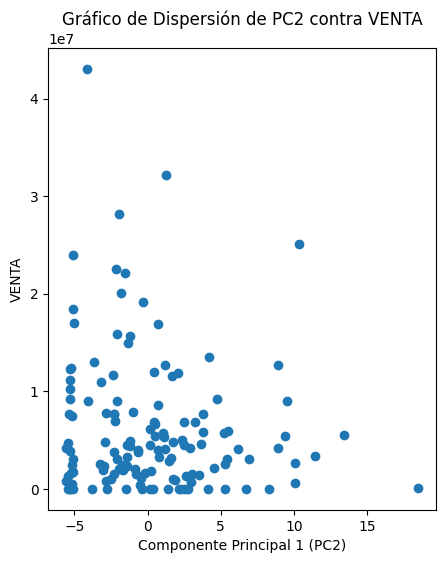

In [33]:
# Crear un gráfico de dispersión de PC2 contra VENTA
plt.figure(figsize=(5, 6))
plt.scatter(df_pca['PC2'], df_pca['VENTA'])
plt.xlabel('Componente Principal 1 (PC2)')
plt.ylabel('VENTA')
plt.title('Gráfico de Dispersión de PC2 contra VENTA')
plt.show()

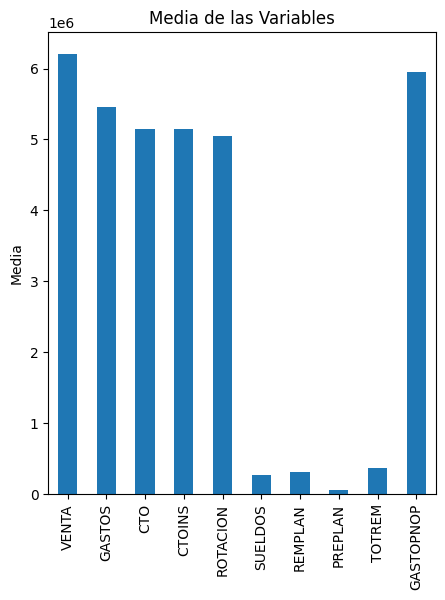

In [36]:
variables = ['VENTA', 'GASTOS', 'CTO', 'CTOINS', 'ROTACION', 'SUELDOS', 'REMPLAN', 'PREPLAN', 'TOTREM', 'GASTOPNOP']
plt.figure(figsize=(5, 6))
df_train[variables].mean().plot.bar()
plt.title('Media de las Variables')
plt.ylabel('Media')
plt.show()
